## Question2
### What characteristics do major user groups have?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
pd.set_option('mode.chained_assignment', None)

### Read file
- data name : Spotify User Behavior Dataset
- data source : kaggle datasets  
  (https://www.kaggle.com/datasets/meeraajayakumar/spotify-user-behavior-dataset)

In [2]:
df = pd.read_excel('../data/Spotify_User_Behavoir/Spotify_data.xlsx')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Age                          520 non-null    object
 1   Gender                       520 non-null    object
 2   spotify_usage_period         520 non-null    object
 3   spotify_listening_device     520 non-null    object
 4   spotify_subscription_plan    520 non-null    object
 5   premium_sub_willingness      520 non-null    object
 6   preffered_premium_plan       312 non-null    object
 7   preferred_listening_content  520 non-null    object
 8   fav_music_genre              520 non-null    object
 9   music_time_slot              520 non-null    object
 10  music_Influencial_mood       520 non-null    object
 11  music_lis_frequency          520 non-null    object
 12  music_expl_method            520 non-null    object
 13  music_recc_rating            520 no

### First, let's identify the user groups that need to be observed importantly.

- Let’s count the number of users by age and gender  
  by dividing them into total users/premium subscriber users/free users.
- The top three "ages and genders" with the largest number of users  
  in each group(total/premium/free) are as follows:
- 1) Age: 20-35 & Female
  2) Age: 20-35 & Male
  3) Age: 12-20 & Female

In [4]:
print("Total".ljust(50, "-"))
print(df[["Age", "Gender"]].value_counts()[0:3])
print("Premium".ljust(50, "-"))
print(df[df["spotify_subscription_plan"]=="Premium (paid subscription)"][["Age", "Gender"]].value_counts()[0:3])
print("Free".ljust(50, "-"))
print(df[df["spotify_subscription_plan"]=="Free (ad-supported)"][["Age", "Gender"]].value_counts()[0:3])

Total---------------------------------------------
Age    Gender
20-35  Female    331
       Male       84
12-20  Female     46
Name: count, dtype: int64
Premium-------------------------------------------
Age    Gender
20-35  Female    42
       Male      21
12-20  Female    18
Name: count, dtype: int64
Free----------------------------------------------
Age    Gender
20-35  Female    289
       Male       63
12-20  Female     28
Name: count, dtype: int64


- Looking at the difference in age composition between total/premium/free group
- The difference between the premium group and free group is most evident in the ratio of people aged 12 to 35.
- The 12-20 year old group accounts for 22.9% of the premium group,  
  but only half of the free user group (11.6%).
- The 20-35 age group accounts for 68.8% of the premium group,  
  but the composition ratio significantly increases to 84.0% of the free user group.

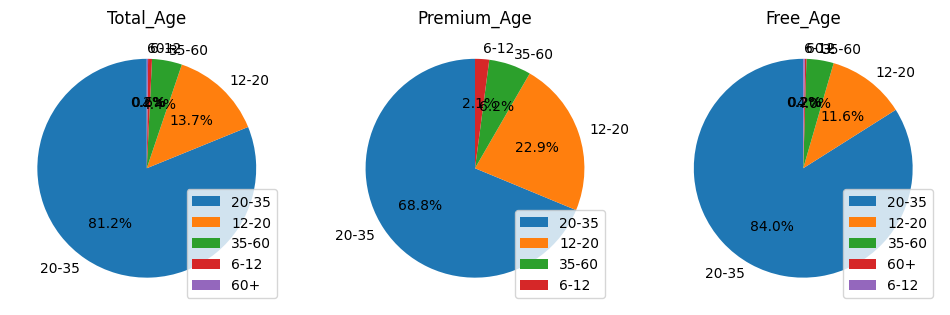

In [5]:
x1 = df["Age"].value_counts()
x2 = df[df["spotify_subscription_plan"]=="Premium (paid subscription)"]["Age"].value_counts()
x3 = df[df["spotify_subscription_plan"]=="Free (ad-supported)"]["Age"].value_counts()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

ax1.pie(x1, labels=x1.index, autopct='%1.1f%%', startangle=90)
ax1.set_title("Total_Age")
ax1.legend(labels=x1.index, loc="lower right")

ax2.pie(x2, labels=x2.index, autopct='%1.1f%%', startangle=90)
ax2.set_title("Premium_Age")
ax2.legend(labels=x2.index, loc="lower right")

ax3.pie(x3, labels=x3.index, autopct='%1.1f%%', startangle=90)
ax3.set_title("Free_Age")
ax3.legend(labels=x3.index, loc="lower right")

plt.show()

- Let's redraw the pie chart above, limiting the gender to female.
- The composition of women aged 12 to 20 in the premium group (27.3%)  
  shows a significant difference from that of the total group (11.8%).

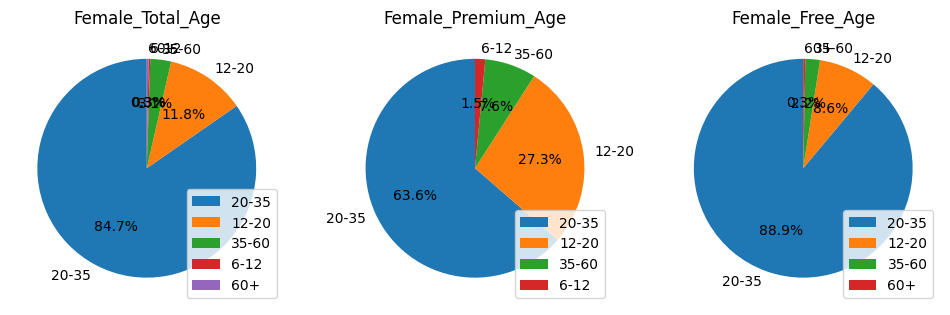

In [6]:
df1 = df[df["Gender"]=="Female"]

x1 = df1["Age"].value_counts()
x2 = df1[df1["spotify_subscription_plan"]=="Premium (paid subscription)"]["Age"].value_counts()
x3 = df1[df1["spotify_subscription_plan"]=="Free (ad-supported)"]["Age"].value_counts()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

ax1.pie(x1, labels=x1.index, autopct='%1.1f%%', startangle=90)
ax1.set_title("Female_Total_Age")
ax1.legend(labels=x1.index, loc="lower right")

ax2.pie(x2, labels=x2.index, autopct='%1.1f%%', startangle=90)
ax2.set_title("Female_Premium_Age")
ax2.legend(labels=x2.index, loc="lower right")

ax3.pie(x3, labels=x3.index, autopct='%1.1f%%', startangle=90)
ax3.set_title("Female_Free_Age")
ax3.legend(labels=x3.index, loc="lower right")

plt.show()

- For men, the user age group is monotonous compared to women.
- In particular, male premium users are limited to the age group of 12-35.

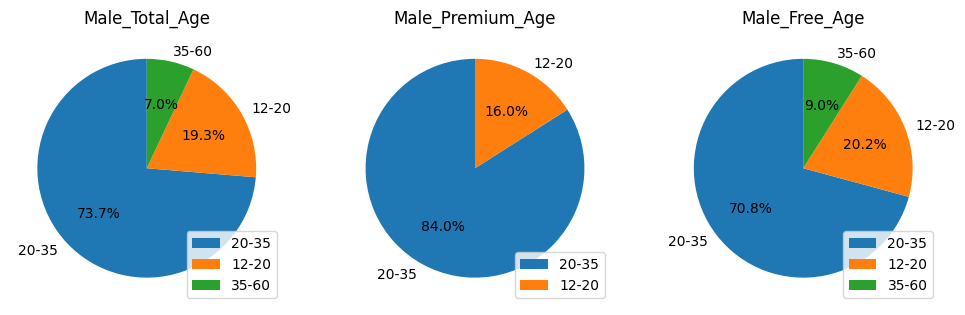

In [7]:
df1 = df[df["Gender"]=="Male"]

x1 = df1["Age"].value_counts()
x2 = df1[df1["spotify_subscription_plan"]=="Premium (paid subscription)"]["Age"].value_counts()
x3 = df1[df1["spotify_subscription_plan"]=="Free (ad-supported)"]["Age"].value_counts()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

ax1.pie(x1, labels=x1.index, autopct='%1.1f%%', startangle=90)
ax1.set_title("Male_Total_Age")
ax1.legend(labels=x1.index, loc="lower right")

ax2.pie(x2, labels=x2.index, autopct='%1.1f%%', startangle=90)
ax2.set_title("Male_Premium_Age")
ax2.legend(labels=x2.index, loc="lower right")

ax3.pie(x3, labels=x3.index, autopct='%1.1f%%', startangle=90)
ax3.set_title("Male_Free_Age")
ax3.legend(labels=x3.index, loc="lower right")

plt.show()

- Considering the number of total users and the composition ratio in the premium subscription class,  
  the user groups subject to important observation were selected as follows.
- 1) Age: 20-35 & Female
  2) Age: 12-20 & Female

In [8]:
df_tg = df[(df['Gender']=='Female')&((df['Age']=='12-20')|(df['Age']=='20-35'))]
df_tg_1 = df[(df['Gender']=='Female')&(df['Age']=='12-20')]
df_tg_2 = df[(df['Gender']=='Female')&(df['Age']=='20-35')]

print(len(df))
print(len(df_tg))
print(len(df_tg_1))
print(len(df_tg_2))

520
377
46
331


### Let’s look at the characteristics of the two selected user groups.

#### period of use
- Overall, the percentage of users who have used the service for more than 2 years is the highest.
- However, women aged 12-20 tend to use the service for a shorter period of time than female users aged 20-35.

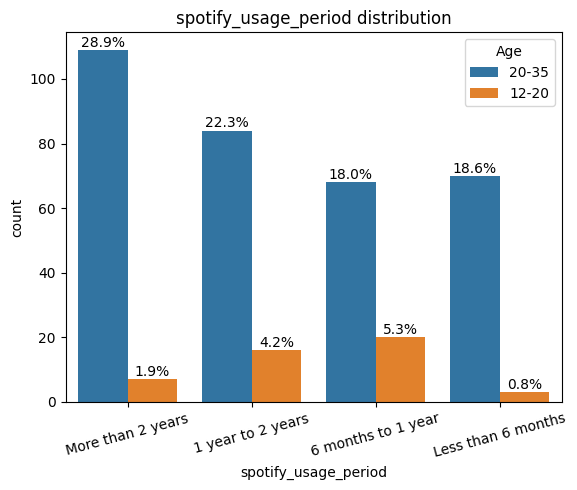

In [9]:
# df_tg

col_name = "spotify_usage_period"
order = df_tg[col_name].value_counts().index

ax = sns.countplot(x=col_name, hue="Age", data=df_tg, order=order)

total = len(df_tg) 
for p in ax.patches:
    percentage = (p.get_height() / total) * 100
    ax.text(p.get_x() + p.get_width() / 2, 
            p.get_height() + 1,
            f'{percentage:.1f}%', 
            ha="center")

plt.xticks(rotation=15)
plt.title(f"{col_name} distribution")

plt.show()

#### spotify_listening_device

- There are also clear differences in the devices used between the two age groups.
- Overall, the majority of people use smartphones to use services.
- However, when broken down by age,  
  women aged 12-20 use computers and laptops more than smartphones,  
  and the proportion of users of other devices such as smart speakers is almost twice that of women aged 20-35.

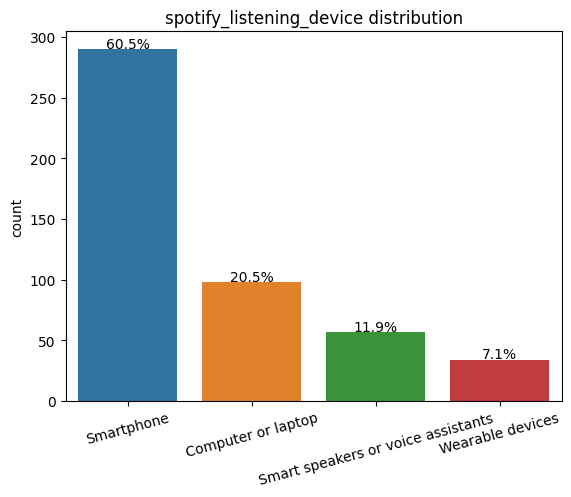

In [10]:
# df_tg

col_name = "spotify_listening_device"

all_responses = []
for response in df_tg[col_name]:
    all_responses.extend([item.strip() for item in response.split(',')])

order = pd.Series(all_responses).value_counts().index

ax = sns.countplot(x=all_responses, order=order)

total = len(all_responses) 
for p in ax.patches:
    percentage = (p.get_height() / total) * 100
    ax.text(p.get_x() + p.get_width() / 2, 
            p.get_height() + 1,
            f'{percentage:.1f}%', 
            ha="center")

plt.xticks(rotation=15)
plt.title(f"{col_name} distribution")

plt.show()

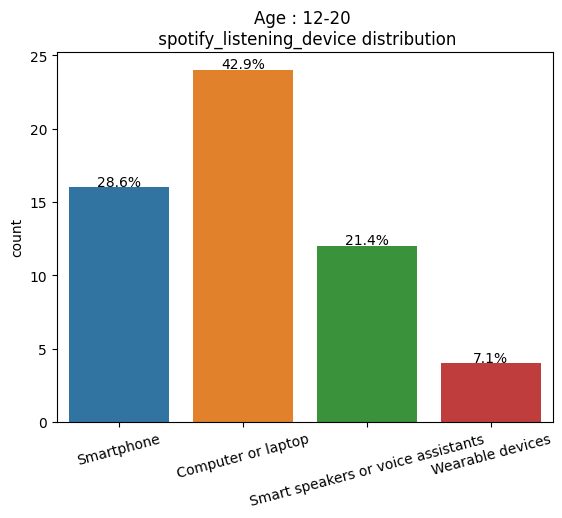

In [11]:
# df_tg_1

col_name = "spotify_listening_device"

all_responses = []
for response in df_tg_1[col_name]:
    all_responses.extend([item.strip() for item in response.split(',')])

ax = sns.countplot(x=all_responses, order=order)

total = len(all_responses) 
for p in ax.patches:
    percentage = (p.get_height() / total) * 100
    ax.text(p.get_x() + p.get_width() / 2, 
            p.get_height() + 0.1,
            f'{percentage:.1f}%', 
            ha="center")

plt.xticks(rotation=15)
plt.title(f"Age : 12-20 \n {col_name} distribution")

plt.show()

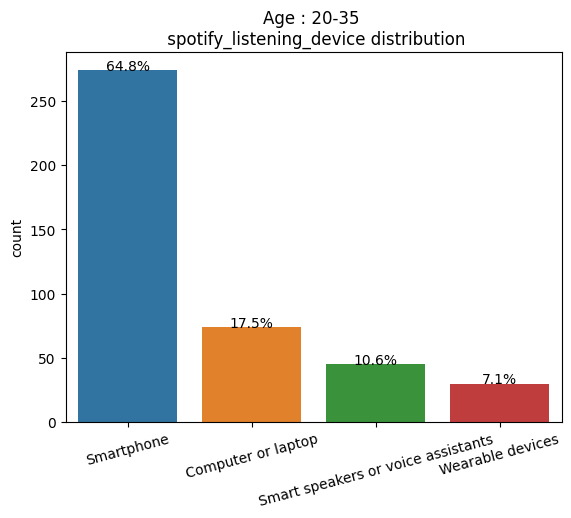

In [12]:
# df_tg_2

col_name = "spotify_listening_device"

all_responses = []
for response in df_tg_2[col_name]:
    all_responses.extend([item.strip() for item in response.split(',')])

ax = sns.countplot(x=all_responses, order=order)

total = len(all_responses) 
for p in ax.patches:
    percentage = (p.get_height() / total) * 100
    ax.text(p.get_x() + p.get_width() / 2, 
            p.get_height() + 0.1,
            f'{percentage:.1f}%', 
            ha="center")

plt.xticks(rotation=15)
plt.title(f"Age : 20-35 \n {col_name} distribution")

plt.show()

#### preferred_listening_content

- The choice of preferred content between music streaming and podcasts  
  also shows significant differences by age.
- Women aged 12-20 have a slightly higher preference for podcasts than music.
- Women aged 20-35 have a much higher preference for music.

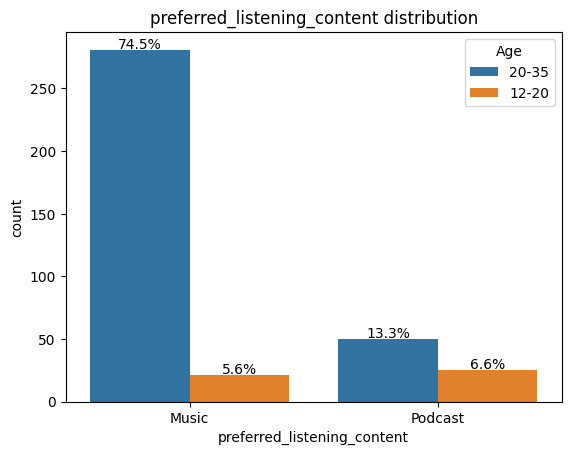

In [13]:
# df_tg

col_name = "preferred_listening_content"
order = df_tg[col_name].value_counts().index

ax = sns.countplot(x=col_name, hue="Age", data=df_tg, order=order)

total = len(df_tg) 
for p in ax.patches:
    percentage = (p.get_height() / total) * 100
    ax.text(p.get_x() + p.get_width() / 2, 
            p.get_height() + 1,
            f'{percentage:.1f}%', 
            ha="center")

#plt.xticks(rotation=15)
plt.title(f"{col_name} distribution")

plt.show()

#### fav_music_genre, fav_pod_genre

- By looking at answers about favorite music and podcast genres,  
  we can draw meaningful conclusions about differences by age.
- That is, women aged 20-35 have more diverse preferred genres than women aged 12-20.
- However, the genres that ranked highest in preference were similar regardless of age  
  (although the rankings were different).

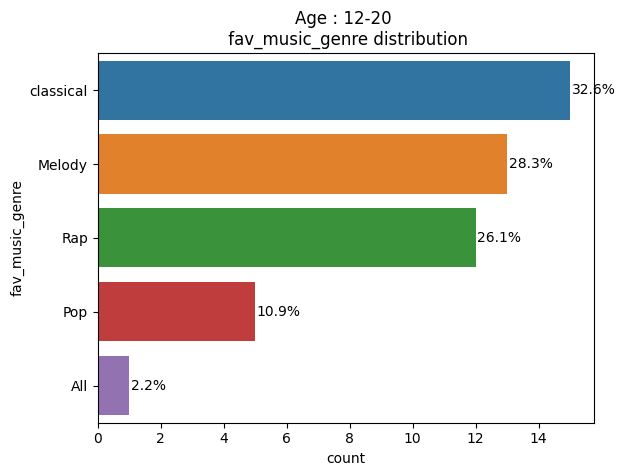

In [14]:
# df_tg_1

col_name = "fav_music_genre"
order = df_tg_1[col_name].value_counts().index

ax = sns.countplot(y=col_name, data=df_tg_1, order=order)

total = len(df_tg_1) 
for p in ax.patches:
    percentage = (p.get_width() / total) * 100
    ax.text(p.get_width() + 0.001*total,  
            p.get_y() + p.get_height()/2,  
            f'{percentage:.1f}%', 
            va='center')
    
plt.title(f"Age : 12-20 \n {col_name} distribution")

plt.show()

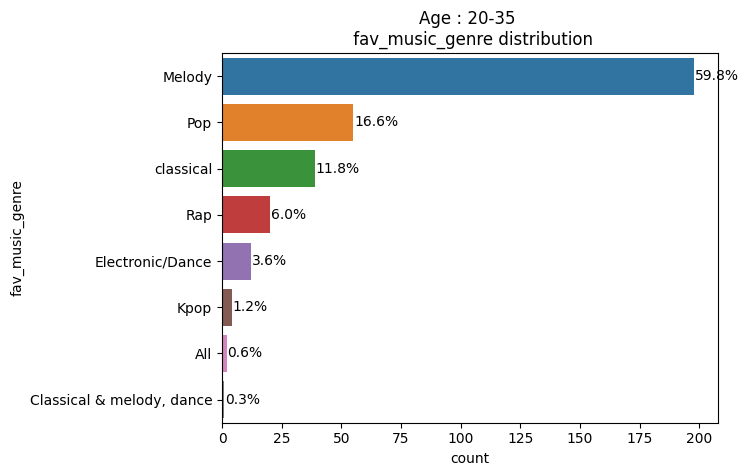

In [15]:
# df_tg_2

col_name = "fav_music_genre"
order = df_tg_2[col_name].value_counts().index

ax = sns.countplot(y=col_name, data=df_tg_2, order=order)

total = len(df_tg_2) 
for p in ax.patches:
    percentage = (p.get_width() / total) * 100
    ax.text(p.get_width() + 0.001*total,  
            p.get_y() + p.get_height()/2,  
            f'{percentage:.1f}%', 
            va='center')
    
plt.title(f"Age : 20-35 \n {col_name} distribution")

plt.show()

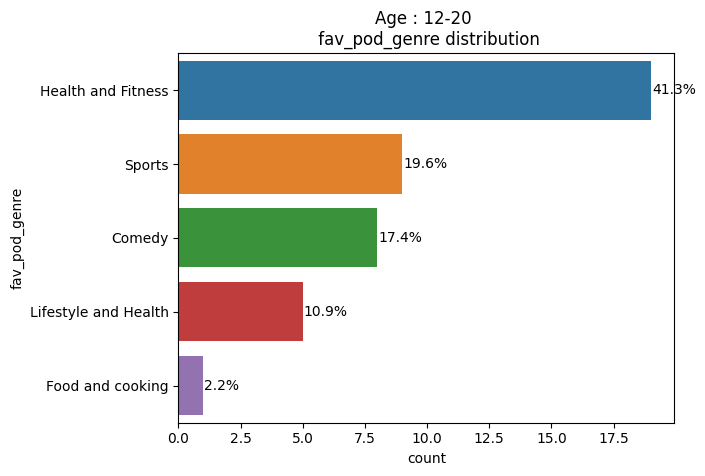

In [16]:
# df_tg_1

col_name = "fav_pod_genre"
order = df_tg_1[col_name].value_counts().index

ax = sns.countplot(y=col_name, data=df_tg_1, order=order)

total = len(df_tg_1) 
for p in ax.patches:
    percentage = (p.get_width() / total) * 100
    ax.text(p.get_width() + 0.001*total,  
            p.get_y() + p.get_height()/2,  
            f'{percentage:.1f}%', 
            va='center')
    
plt.title(f"Age : 12-20 \n {col_name} distribution")

plt.show()

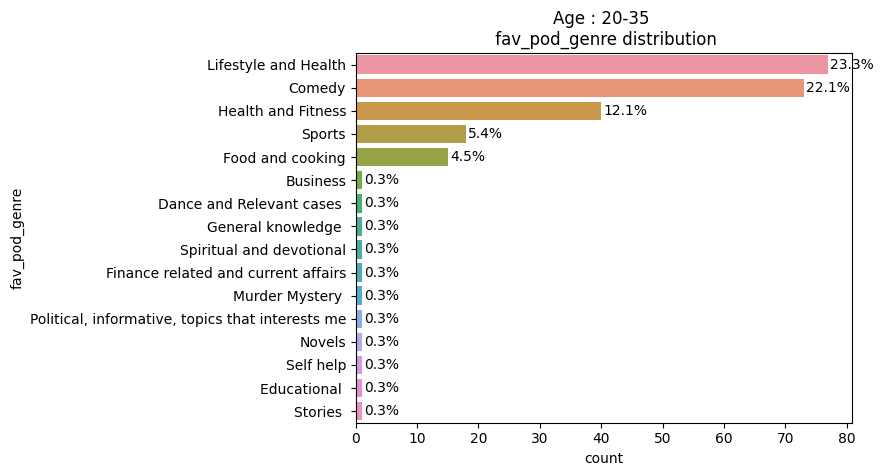

In [17]:
# df_tg_2

col_name = "fav_pod_genre"
order = df_tg_2[col_name].value_counts().index

ax = sns.countplot(y=col_name, data=df_tg_2, order=order)

total = len(df_tg_2) 
for p in ax.patches:
    percentage = (p.get_width() / total) * 100
    ax.text(p.get_width() + 0.001*total,  
            p.get_y() + p.get_height()/2,  
            f'{percentage:.1f}%', 
            va='center')
    
plt.title(f"Age : 20-35 \n {col_name} distribution")

plt.show()

#### pod_variety_satisfaction

- Above, it was confirmed that women aged 20-35 have more diverse preferred genres than women aged 12-20.
- So what was the response to the genre diversity score?
- Let's look at the ratings for podcast genre diversity (there are no ratings for music genre diversity).
- Women aged 20-35, who have a wide spectrum of preferred genres,  
  gave lower scores on podcast diversity than those aged 12-20.
- It shows that complementing genre diversity can lead to a positive response from women aged 20-35.

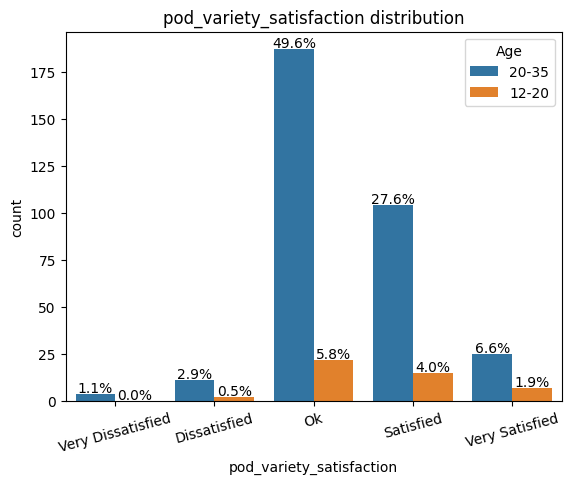

In [18]:
col_name = "pod_variety_satisfaction"
order = ['Very Dissatisfied', 'Dissatisfied', 'Ok', 'Satisfied', 'Very Satisfied']

ax = sns.countplot(x=col_name, hue="Age", data=df_tg, order=order)

total = len(df_tg) 
for p in ax.patches:
    percentage = (p.get_height() / total) * 100
    ax.text(p.get_x() + p.get_width() / 2, 
            p.get_height() + 1,
            f'{percentage:.1f}%', 
            ha="center")

plt.xticks(rotation=15)
plt.title(f"{col_name} distribution")

plt.show()

In [19]:
satisfaction_mapping = {
    'Very Dissatisfied': 1,
    'Dissatisfied': 2,
    'Ok': 3,
    'Satisfied': 4,
    'Very Satisfied': 5
}

df_tg_1['pod_variety_satisfaction_rating'] = df_tg_1['pod_variety_satisfaction'].map(satisfaction_mapping)
df_tg_2['pod_variety_satisfaction_rating'] = df_tg_2['pod_variety_satisfaction'].map(satisfaction_mapping)

print("Age 12-20: ", df_tg_1['pod_variety_satisfaction_rating'].mean().round(2))
print("Age 20-35: ", df_tg_2['pod_variety_satisfaction_rating'].mean().round(2))

Age 12-20:  3.59
Age 20-35:  3.41


### Analysis

- The analysis focused on the characteristics of female users aged 12-20 and female users aged 20-35.
- The characteristics of the two user groups can be divided into “external diversity” and “internal diversity”.
- "External diversity" refers to the diversity of user preferences with respect to external factors,  
  such as services other than Spotify or devices used to use music streaming services.
- "Internal diversity" refers to the diversity of user preferences for internal elements of Spotify service content,  
  such as music/podcast genres.
- For women aged 12-20, external diversity is high and internal diversity is low.
- Conversely, for women aged 20-35, external diversity is low but internal diversity is high.